# Multi-Template-Matching
## Tutorial 1 - Introduction

This tutorial gives an overview of the different ways to use multiple template matching for object recognition.  
More documentation is available in the [wiki](https://github.com/LauLauThom/MultiTemplateMatching/wiki) section of the repository.

## Citations
If you use this implementation for your research, please cite:

Thomas, L.S.V., Gehrig, J.   
*Multi-template matching: a versatile tool for object-localization in microscopy images.*  
BMC Bioinformatics 21, 44 (2020). https://doi.org/10.1186/s12859-020-3363-7

-------------------------

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This tutorial is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.  
You are free to distribute and/or modify this tutorial, provided you attribute the author:  

Multi-Template Matching python package online - _Tutorial 1: Introduction_  
Laurent Thomas - 2019   
https://github.com/multi-template-matching/MultiTemplateMatching-Python/blob/master/tutorials/Tutorial1-Introduction.ipynb

## Let's code !

In [1]:
cd ..

S:\


In [2]:
# 1st import the package and check its version
import MTM
print("MTM version: ", MTM.__version__)

from MTM import matchTemplates, drawBoxesOnRGB

import cv2
from skimage.data import coins
import matplotlib.pyplot as plt

MTM version:  1.6.1


The main function in MTM is `matchTemplates`.  
Let's have a look at its docstring.

As you can read from the doc, the function have 2 main image arguments :
- a list of template images to search
- an image in which to search for objects using the templates

Let's open some image of coins from scikit-image, we will showcase the multi-template matching for the detection of the coin locations

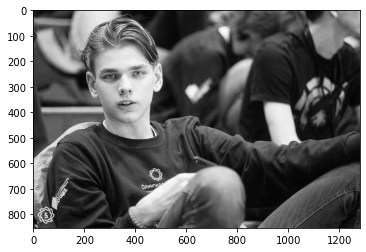

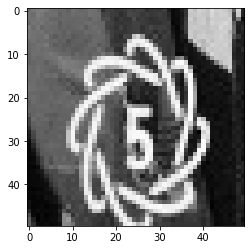

In [98]:
# image = coins()

image = cv2.imread('data/img2.jpg', 0)#[700:, :100]
# image[90:115, 40:60] = 0
template = cv2.imread('data/img2.jpg', 0)[760:-20, :100]#cv2.imread('data/template.jpg', 0)[90:520, 350:790]
template = cv2.resize(template, (50, 50))
# template = cv2.GaussianBlur(template, (5,5),10)
# image = cv2.GaussianBlur(image, (5,5),10)

plt.imshow(image, cmap="gray")
plt.figure()
# smallCoin = coins()[37:37+38, 80:80+41]
# template = 255 - template
plt.imshow(template, cmap="gray")

## - Calling matchTemplates with a single template
We will now use the `matchTemplates` that we have seen above.

Found 119 hits
     TemplateName                 BBox     Score
0           small     (695, 5, 41, 38)  0.045204
1           small   (1080, 53, 41, 38)  0.050001
2           small   (334, 391, 41, 38)  0.055991
3           small   (340, 445, 41, 38)  0.058570
6           small   (244, 269, 41, 38)  0.059173
...           ...                  ...       ...
1092        small   (402, 677, 41, 38)  0.431406
1097        small  (1074, 507, 41, 38)  0.433256
1102        small    (936, 95, 41, 38)  0.445699
1103        small   (205, 162, 41, 38)  0.450513
1110        small  (1221, 611, 41, 38)  0.479982

[119 rows x 3 columns]


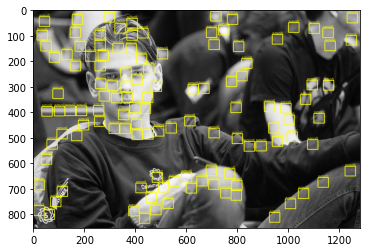

In [99]:
# 1st format the template into a list of tuple (label, templateImage)
listTemplate = [('small', smallCoin)]

# Then call the function matchTemplates (here a single template)
Hits = matchTemplates(listTemplate, image, score_threshold=0.5, method=1, maxOverlap=0)

print("Found {} hits".format( len(Hits.index) ) )
print(Hits)
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

## - View the detections
We can then represent the detections as bounding boxes overlaid on the image, with a tag for the label.

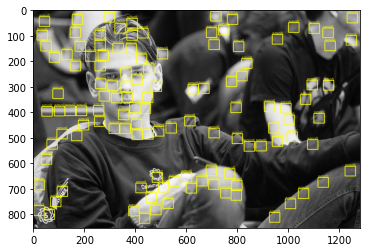

In [100]:
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

## - Decreasing the score-threshold
This is pretty good already but we dont catch some of the small coins.  
Let's reduce the score threshold to be more permissive e.g. `score_threshold = 0.4`

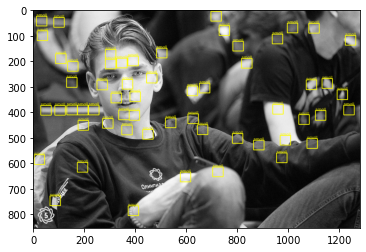

In [34]:
Hits = matchTemplates(listTemplate, image, score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

## - Using multiple templates
Using a single template is quite good already for this particular example.    
What if now we would like to do better and somehow differentiate between small and large coins...  
The function matchTemplates allow to use several templates, and yields the best detections for each location in the image. 

Let's crop one of the big coin to use as a second template.

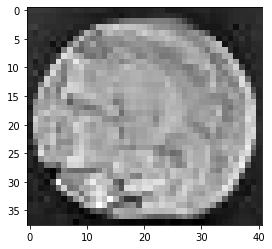

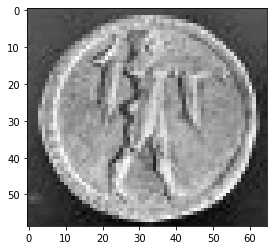

In [10]:
largeCoin = coins()[14:14+59,302:302+65]
plt.figure(0)
plt.imshow(smallCoin, cmap="gray")
plt.figure(1)
plt.imshow(largeCoin, cmap="gray")

Again we pack the templates in a list of tuples in the form `(label, template)`.    
Before calling the function `matchTemplates` and displaying the result.

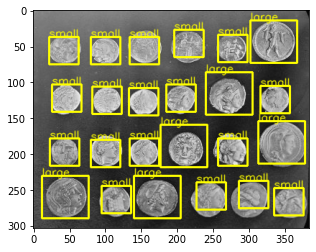

In [11]:
listTemplate = [("small", smallCoin), ("large", largeCoin)]
Hits = matchTemplates(listTemplate, image, score_threshold=0.4, method=cv2.TM_CCOEFF_NORMED, maxOverlap=0)
Overlay = drawBoxesOnRGB(image, Hits, showLabel=True)
plt.imshow(Overlay)

Et voila !  
Using several templates can be used to increase the chance to catch your object if it appears with different perspectives, or to perform classification of the detections using different templates as "classes".  
However, the more templates the longer the computation time.